<a href="https://colab.research.google.com/github/Kyvelos/Thesis/blob/main/V1_2D_TRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Kyvelos/Thesis.git

Cloning into 'Thesis'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 35 (delta 13), reused 16 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 484.37 KiB | 4.66 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
%ls

drive/  sample_data/  Thesis/


In [ ]:
!pip install SimpleITK pynrrd numpy matplotlib ipywidgets  google.colab pandas pydicom ace_tools> /dev/null 2>&1

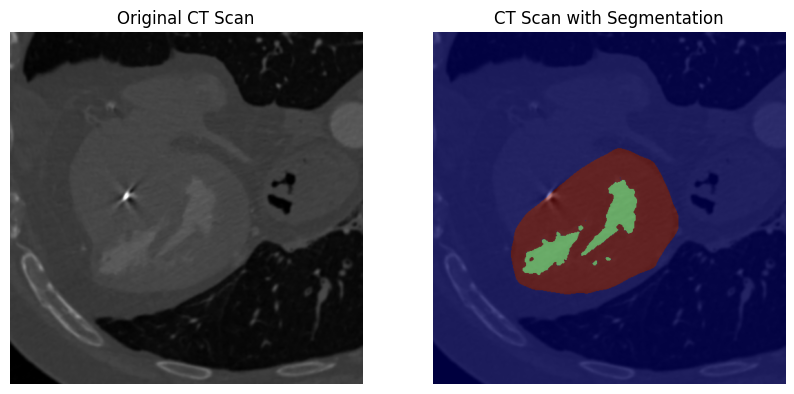

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import nrrd
import os

# Ορισμός μονοπατιού για τον Ασθενή 3
patient_id = 3
patient_path = f"/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter/Patient {patient_id}"

# Ορισμός αρχείων
ct_scan_file = os.path.join(patient_path, "6 No series description.nrrd")
segmentation_file = os.path.join(patient_path, "Segmentation.seg.nrrd")

# Φόρτωση δεδομένων
ct_scan, _ = nrrd.read(ct_scan_file)
segmentation, _ = nrrd.read(segmentation_file)

# Επιλογή μιας μεσαίας φέτας για οπτικοποίηση
slice_idx = 75



# Προβολή των εικόνων δίπλα-δίπλα
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(ct_scan[:, :, slice_idx], cmap="gray")
axes[0].set_title("Original CT Scan")
axes[0].axis("off")

axes[1].imshow(ct_scan[:, :, slice_idx], cmap="gray")
axes[1].imshow(segmentation[:, :, slice_idx], cmap="jet", alpha=0.5)  # Overlay του segmentation
axes[1].set_title("CT Scan with Segmentation")
axes[1].axis("off")

plt.show()


The numbers you see in the tables represent voxel intensity values from the CT scan and the segmentation mask.


First Table (CT Scan Slice)

Each number represents the Hounsfield Unit (HU) of a voxel in the CT scan.

Hounsfield Units (HU) measure tissue density:

Air ≈ -1000 HU

Lung ≈ -700 to -500 HU

Fat ≈ -100 to -50 HU

Water = 0 HU

Muscle/Soft Tissue ≈ 40-60 HU

Bone ≈ 300-1000+ HU


These values allow differentiation between different tissues in the heart.


Second Table (Segmentation Slice)

This is a label mask, where each number represents a different anatomical structure.

The numbers are usually small integers like 0, 1, 2, 3, etc., meaning:

0 = Background (no segmentation)

1 = Left Ventricle

2 = Right Ventricle

3 = Myocardium

4+ = Other structures (depending on the dataset)

In [ ]:
# Εμφάνιση των δεδομένων στο Colab
print("CT Scan Slice:")
display(ct_df)

print("Segmentation Slice:")
display(seg_df)

# Εμφάνιση μόνο των πρώτων 10 γραμμών για να μην γεμίσει το notebook
print("CT Scan Slice - First 10 Rows:")
print(ct_df.head(10))

print("Segmentation Slice - First 10 Rows:")
print(seg_df.head(10))


import pandas as pd
import os

# Ορισμός διαδρομής αποθήκευσης
ct_excel_path = os.path.join(resrc_folder, "Patient_3_CT_Slice.xlsx")
seg_excel_path = os.path.join(resrc_folder, "Patient_3_Segmentation_Slice.xlsx")

# Αποθήκευση των αρχείων
ct_df.to_excel(ct_excel_path, index=False)
seg_df.to_excel(seg_excel_path, index=False)

print(f"Το CT Scan αποθηκεύτηκε στο: {ct_excel_path}")
print(f"Το Segmentation αποθηκεύτηκε στο: {seg_excel_path}")


CT Scan Slice:


NameError: name 'ct_df' is not defined

Είναι ένας πίνακας 512x512, δηλαδή μια φέτα (slice) από τον 3D όγκο.
Οι τιμές είναι αριθμοί σε Hounsfield Units (HU).

Κάποιες ενδεικτικές τιμές:

323, 326, 331, ... (μαλακοί ιστοί)

-880, -882, -872, ... (αέρας ή πνεύμονες)

400-500 (οστά ή πυκνοί ιστοί)

Segmentation Mask (Patient_3_Segmentation_Slice.xlsx)

Επίσης 512x512, αλλά οι τιμές είναι μόνο 0, 1, 2, ..., που αντιπροσωπεύουν διαφορετικά όργανα.

Οι πρώτες τιμές είναι όλες 0, που σημαίνει ότι το segmentation δεν καλύπτει αυτή την περιοχή.

In [ ]:
import os
import numpy as np
import nrrd
import shutil

# Define paths for Patient 3
patient_id = 3
patient_path = f"/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter/Patient {patient_id}"

# Source folders
dicom_folder = os.path.join(patient_path, "ScalarVolume_15")  # Change if the number is different
segmentation_file = os.path.join(patient_path, "Segmentation.seg.nrrd")

# Destination folder for filtered DICOM slices
filtered_folder = os.path.join(patient_path, "Filtered_Patient_3")
os.makedirs(filtered_folder, exist_ok=True)

# Load segmentation file
segmentation_data, _ = nrrd.read(segmentation_file)

# Identify slices that contain segmentation (non-zero values)
segmented_slices = np.where(np.any(segmentation_data != 0, axis=(0, 1)))[0]

# Add 5 extra slices before and after each segmented slice
extra_slices = []
for slice_idx in segmented_slices:
    extra_slices.extend(range(max(0, slice_idx - 5), min(segmentation_data.shape[2], slice_idx + 6)))

# Remove duplicates and sort
final_slices = sorted(set(extra_slices))

# Get sorted DICOM files
dicom_files = sorted(os.listdir(dicom_folder))

# Copy the selected DICOM slices to the new folder
for i, dicom_file in enumerate(dicom_files):
    if i in final_slices:
        src_path = os.path.join(dicom_folder, dicom_file)
        dst_path = os.path.join(filtered_folder, dicom_file)
        shutil.copy(src_path, dst_path)

print(f"Filtered DICOM files copied to: {filtered_folder}")


Filtered DICOM files copied to: /content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter/Patient 3/Filtered_Patient_3


In [ ]:
import shutil
import os

# Define source and destination paths
source_folder = "/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter/Patient 3/Filtered_Patient_3"
destination_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Move the folder
shutil.move(source_folder, destination_folder)

print(f"Filtered data moved to: {destination_folder}")


Error: Destination path '/content/drive/MyDrive/[06]/Filtered_Patient_3/Filtered_Patient_3' already exists

In [ ]:
import os

# Define the correct path
dicom_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Filtered_Patient_3"

# List all files in the directory
if os.path.exists(dicom_folder):
    files = os.listdir(dicom_folder)
    print("Files in the directory:", files)
else:
    print("❌ The directory does not exist. Check your Google Drive.")

Files in the directory: ['IMG0038.dcm', 'IMG0039.dcm', 'IMG0040.dcm', 'IMG0041.dcm', 'IMG0042.dcm', 'IMG0043.dcm', 'IMG0044.dcm', 'IMG0045.dcm', 'IMG0046.dcm', 'IMG0047.dcm', 'IMG0048.dcm', 'IMG0049.dcm', 'IMG0050.dcm', 'IMG0051.dcm', 'IMG0052.dcm', 'IMG0053.dcm', 'IMG0054.dcm', 'IMG0055.dcm', 'IMG0056.dcm', 'IMG0057.dcm', 'IMG0058.dcm', 'IMG0059.dcm', 'IMG0060.dcm', 'IMG0061.dcm', 'IMG0062.dcm', 'IMG0063.dcm', 'IMG0064.dcm', 'IMG0065.dcm', 'IMG0066.dcm', 'IMG0067.dcm', 'IMG0068.dcm', 'IMG0069.dcm', 'IMG0070.dcm', 'IMG0071.dcm', 'IMG0072.dcm', 'IMG0073.dcm', 'IMG0074.dcm', 'IMG0075.dcm', 'IMG0076.dcm', 'IMG0077.dcm', 'IMG0078.dcm', 'IMG0079.dcm', 'IMG0080.dcm', 'IMG0081.dcm', 'IMG0082.dcm', 'IMG0083.dcm', 'IMG0084.dcm', 'IMG0085.dcm', 'IMG0086.dcm', 'IMG0087.dcm', 'IMG0088.dcm', 'IMG0089.dcm', 'IMG0090.dcm', 'IMG0091.dcm', 'IMG0092.dcm', 'IMG0093.dcm', 'IMG0094.dcm', 'IMG0095.dcm', 'IMG0096.dcm', 'IMG0097.dcm', 'IMG0098.dcm', 'IMG0099.dcm', 'IMG0100.dcm', 'IMG0101.dcm', 'IMG0102.dcm', 

In [ ]:
import os
import nrrd
import numpy as np

# Define paths
source_segmentation_file = "/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter/Patient 3/Segmentation.seg.nrrd"
destination_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Segmentation_Files"

# Ensure destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Load segmentation data
segmentation_data, _ = nrrd.read(source_segmentation_file)

# Identify slices that contain segmentation (non-zero values)
segmented_slices = np.where(np.any(segmentation_data != 0, axis=(0, 1)))[0]

# Add 5 extra slices before and after each segmented slice
extra_slices = []
for slice_idx in segmented_slices:
    extra_slices.extend(range(max(0, slice_idx - 5), min(segmentation_data.shape[2], slice_idx + 6)))

# Remove duplicates and sort
final_slices = sorted(set(extra_slices))

# Extract only the selected slices
filtered_segmentation = segmentation_data[:, :, final_slices]

# Save the new filtered segmentation file
filtered_segmentation_file = os.path.join(destination_folder, "Filtered_Segmentation.seg.nrrd")
nrrd.write(filtered_segmentation_file, filtered_segmentation)

print(f"✅ Filtered segmentation saved at: {filtered_segmentation_file}")


✅ Filtered segmentation saved at: /content/drive/MyDrive/[06]/Filtered_Patient_3/Segmentation_Files/Filtered_Segmentation.seg.nrrd


In [ ]:
import os
import nrrd

# Define paths
dicom_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Filtered_Patient_3"
segmentation_file = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Segmentation_Files/Filtered_Segmentation.seg.nrrd"

# Count the number of DICOM slices
if os.path.exists(dicom_folder):
    dicom_files = [f for f in os.listdir(dicom_folder) if f.endswith(".dcm")]
    num_dicom_slices = len(dicom_files)
else:
    num_dicom_slices = 0
    print("❌ DICOM folder not found!")

# Count the number of segmentation slices
if os.path.exists(segmentation_file):
    segmentation_data, _ = nrrd.read(segmentation_file)
    num_segmentation_slices = segmentation_data.shape[2]  # Number of slices in the segmentation
else:
    num_segmentation_slices = 0
    print("❌ Segmentation file not found!")

# Display results
print(f"📂 Number of DICOM slices: {num_dicom_slices}")
print(f"📂 Number of Segmentation slices: {num_segmentation_slices}")


📂 Number of DICOM slices: 146
📂 Number of Segmentation slices: 146


In [ ]:
import os
import pydicom
import numpy as np
from scipy.ndimage import rotate

# Define paths
dicom_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Filtered_Patient_3"
rotated_dicom_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Rotated_DICOMs"

# Ensure the destination folder exists
os.makedirs(rotated_dicom_folder, exist_ok=True)

# Get list of DICOM files
dicom_files = sorted([f for f in os.listdir(dicom_folder) if f.endswith(".dcm")])

# Rotate all DICOM images counterclockwise by 90 degrees
for dicom_file in dicom_files:
    dicom_path = os.path.join(dicom_folder, dicom_file)
    rotated_dicom_path = os.path.join(rotated_dicom_folder, dicom_file)

    # Read DICOM file
    dicom_data = pydicom.dcmread(dicom_path)
    dicom_img = dicom_data.pixel_array

    # Rotate image counterclockwise by 90 degrees
    rotated_img = rotate(dicom_img, 90, reshape=False)  # Keep the same shape

    # Update pixel data in DICOM file
    dicom_data.PixelData = rotated_img.tobytes()

    # Save the rotated DICOM file
    dicom_data.save_as(rotated_dicom_path)

print(f"✅ All DICOM files have been rotated and saved in: {rotated_dicom_folder}")


✅ All DICOM files have been rotated and saved in: /content/drive/MyDrive/[06]/Filtered_Patient_3/Rotated_DICOMs


In [ ]:
import os
import pydicom
import numpy as np

# Define paths
dicom_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Rotated_DICOMs"
mirrored_dicom_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Mirrored_DICOMs"

# Ensure the destination folder exists
os.makedirs(mirrored_dicom_folder, exist_ok=True)

# Get list of DICOM files
dicom_files = sorted([f for f in os.listdir(dicom_folder) if f.endswith(".dcm")])

# Mirror all DICOM images upside down (flip vertically)
for dicom_file in dicom_files:
    dicom_path = os.path.join(dicom_folder, dicom_file)
    mirrored_dicom_path = os.path.join(mirrored_dicom_folder, dicom_file)

    # Read DICOM file
    dicom_data = pydicom.dcmread(dicom_path)
    dicom_img = dicom_data.pixel_array

    # Flip the image vertically (upside down)
    mirrored_img = np.flipud(dicom_img)

    # Update pixel data in DICOM file
    dicom_data.PixelData = mirrored_img.tobytes()

    # Save the mirrored DICOM file
    dicom_data.save_as(mirrored_dicom_path)

print(f"✅ All DICOM files have been mirrored upside down and saved in: {mirrored_dicom_folder}")


✅ All DICOM files have been mirrored upside down and saved in: /content/drive/MyDrive/[06]/Filtered_Patient_3/Mirrored_DICOMs


In [ ]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import nrrd
from IPython.display import display

# Define paths
dicom_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Mirrored_DICOMs"
segmentation_file = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Segmentation_Files/Filtered_Segmentation.seg.nrrd"  # Adjust if the filename is different

# Get list of DICOM files and sort them
dicom_files = sorted([f for f in os.listdir(dicom_folder) if f.endswith(".dcm")])

# Load segmentation data
segmentation_data, _ = nrrd.read(segmentation_file)

# Function to load a specific DICOM file
def load_dicom(index):
    dicom_path = os.path.join(dicom_folder, dicom_files[index])
    dicom_data = pydicom.dcmread(dicom_path)
    return dicom_data.pixel_array  # Extract the image

# Function to update the displayed images
def update_slice(slice_index):
    dicom_img = load_dicom(slice_index)
    segmentation_img = segmentation_data[:, :, slice_index]  # Get the corresponding segmentation slice

    # Plot DICOM and Segmentation
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # DICOM Image
    axes[0].imshow(dicom_img, cmap="gray")
    axes[0].set_title(f"DICOM Slice {slice_index + 1}")
    axes[0].axis("off")

    # DICOM + Segmentation Overlay
    axes[1].imshow(dicom_img, cmap="gray")
    axes[1].imshow(segmentation_img, cmap="jet", alpha=0.5)  # Overlay segmentation
    axes[1].set_title(f"DICOM with Segmentation Overlay")
    axes[1].axis("off")

    plt.show()

# Create a slider to navigate through slices
slice_slider = widgets.IntSlider(min=0, max=len(dicom_files)-1, step=1, description="Slice:")
interactive_plot = widgets.interactive(update_slice, slice_index=slice_slider)

display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Slice:', max=145), Output()), _dom_classes=('widget-inte…

In [ ]:
print(f"Total DICOM Slices: {len(dicom_files)}")
print(f"Total Segmentation Slices: {segmentation_data.shape[2]}")


Total DICOM Slices: 146
Total Segmentation Slices: 146


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pydicom

# Function to visualize DICOM and segmentation slices interactively
def visualize_slices(dicom_slice_idx, seg_slice_idx):
    # Load selected DICOM slice
    dicom_sample = pydicom.dcmread(os.path.join(dicom_folder, dicom_files[dicom_slice_idx]))
    dicom_img = dicom_sample.pixel_array

    # Load selected segmentation slice
    seg_img = segmentation_data[:, :, seg_slice_idx]

    # Plot them side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display DICOM slice
    axes[0].imshow(dicom_img, cmap="gray")
    axes[0].set_title(f"DICOM Slice {dicom_slice_idx}")
    axes[0].axis("off")

    # Display Segmentation slice
    axes[1].imshow(seg_img, cmap="jet")
    axes[1].set_title(f"Segmentation Slice {seg_slice_idx}")
    axes[1].axis("off")

    plt.show()

# Create sliders for DICOM and segmentation slices
dicom_slider = widgets.IntSlider(
    min=0, max=len(dicom_files)-1, step=1, value=50, description="DICOM Slice:"
)
segmentation_slider = widgets.IntSlider(
    min=0, max=segmentation_data.shape[2]-1, step=1, value=50, description="Segmentation Slice:"
)

# Display interactive widget
display(widgets.interactive(visualize_slices, dicom_slice_idx=dicom_slider, seg_slice_idx=segmentation_slider))



interactive(children=(IntSlider(value=50, description='DICOM Slice:', max=145), IntSlider(value=50, descriptio…

In [ ]:
import os
import pydicom
import nrrd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
dicom_folder = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Mirrored_DICOMs"
segmentation_file = "/content/drive/MyDrive/[06]/Filtered_Patient_3/Segmentation_Files/Filtered_Segmentation.seg.nrrd"

# Load segmentation mask
segmentation_data, _ = nrrd.read(segmentation_file)

# Get list of sorted DICOM files
dicom_files = sorted([f for f in os.listdir(dicom_folder) if f.endswith(".dcm")])

# Initialize arrays for storing images and masks
image_data = []
mask_data = []

# Load each DICOM file and corresponding segmentation mask
for i, dicom_file in enumerate(dicom_files):
    dicom_path = os.path.join(dicom_folder, dicom_file)

    # Read DICOM image
    dicom_data = pydicom.dcmread(dicom_path)
    dicom_img = dicom_data.pixel_array

    # Normalize DICOM pixel values (scale to 0-1)
    dicom_img = dicom_img.astype(np.float32)
    dicom_img = (dicom_img - np.min(dicom_img)) / (np.max(dicom_img) - np.min(dicom_img))

    # Load corresponding segmentation slice
    if i < segmentation_data.shape[2]:  # Ensure alignment
        mask_img = segmentation_data[:, :, i]
    else:
        mask_img = np.zeros_like(dicom_img)  # If no segmentation, create an empty mask

    # Convert mask to categorical format (if multi-class segmentation)
    mask_img = to_categorical(mask_img, num_classes=4)  # Adjust num_classes based on segmentation labels



    # Append to lists
    image_data.append(dicom_img)
    mask_data.append(mask_img)

# Convert to NumPy arrays
image_data = np.array(image_data)
mask_data = np.array(mask_data)

# Split into training, validation, and test sets (80-10-10)
X_train, X_temp, y_train, y_temp = train_test_split(image_data, mask_data, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shapes
print(f"✅ Training set: {X_train.shape}, {y_train.shape}")
print(f"✅ Validation set: {X_val.shape}, {y_val.shape}")
print(f"✅ Test set: {X_test.shape}, {y_test.shape}")

✅ Training set: (116, 512, 512), (116, 512, 512, 4)
✅ Validation set: (15, 512, 512), (15, 512, 512, 4)
✅ Test set: (15, 512, 512), (15, 512, 512, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model

# Smaller U-Net Model for Faster Training
def unet_small(input_shape):
    inputs = Input(input_shape)

    # Encoder (Reduced filters)
    c1 = Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
    c1 = Conv2D(32, (3, 3), activation="relu", padding="same")(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation="relu", padding="same")(p1)
    c2 = Conv2D(64, (3, 3), activation="relu", padding="same")(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = Conv2D(128, (3, 3), activation="relu", padding="same")(p2)
    c3 = Conv2D(128, (3, 3), activation="relu", padding="same")(c3)

    # Decoder
    u1 = UpSampling2D((2, 2))(c3)
    u1 = Concatenate()([u1, c2])
    c4 = Conv2D(64, (3, 3), activation="relu", padding="same")(u1)
    c4 = Conv2D(64, (3, 3), activation="relu", padding="same")(c4)

    u2 = UpSampling2D((2, 2))(c4)
    u2 = Concatenate()([u2, c1])
    c5 = Conv2D(32, (3, 3), activation="relu", padding="same")(u2)
    c5 = Conv2D(32, (3, 3), activation="relu", padding="same")(c5)

    # Output layer
    outputs = Conv2D(4, (1, 1), activation="softmax")(c5)

    return Model(inputs, outputs)

# Create model
input_shape = (512, 512, 1)  # Keep original image size
model = unet_small(input_shape)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 512, 512, 32)   │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 512, 512, 32)   │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 32)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 64)   │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 64)   │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 256, 256, 128)  │              0 │ conv2d_5[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256, 256, 192)  │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 256, 256, 64)   │        110,656 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 512, 512, 64)   │              0 │ conv2d_7[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 512, 512, 96)   │              0 │ up_sampling2d_1[0][0], │
│ (Concatenate)             │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 512, 512, 32)   │         27,680 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)    

 Total params: 471,076 (1.80 MB)

 Trainable params: 471,076 (1.80 MB)

 Non-trainable params: 0 (0.00 B)